In [ ]:
import pandas as pd
import keras
import numpy as np
from keras.utils import to_categorical
from keras import layers, models
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

x = np.concatenate((train_images, test_images))
y = np.concatenate((train_labels, test_labels))

np.random.seed(2019)
train_size = 55076/70000
index = np.random.rand(len(x)) < train_size
train_images, test_images = x[index], x[~index]
train_labels, test_labels = y[index], y[~index]

index = np.random.rand(len(test_images)) < 0.6585
val_images, test_images = test_images[index], test_images[~index]
val_labels, test_labels = test_labels[index], test_labels[~index]

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
for i in range(len(train_labels)):
  if train_labels[i] % 2 == 0:
    train_labels[i] = 1
  else:
    train_labels[i] = 0

for i in range(len(test_labels)):
  if test_labels[i] % 2 == 0:
    test_labels[i] = 1
  else:
    test_labels[i] = 0

for i in range(len(val_labels)):
  if val_labels[i] % 2 == 0:
    val_labels[i] = 1
  else:
    val_labels[i] = 0

In [ ]:
train_images = train_images.reshape((55000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((5000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

val_images = val_images.reshape((10000, 28, 28, 1))
val_images = val_images.astype('float32') / 255

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
val_labels = to_categorical(val_labels)

In [ ]:
keras.backend.clear_session()

net_2conv_2dense = models.Sequential([
      layers.Conv2D(5, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1), kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Conv2D(2, kernel_size = (3, 3), activation = 'relu', kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(5, activation= 'relu'),
      layers.Dense(2, activation= 'sigmoid')
])

net_2conv_2dense.summary()

net_2conv_2dense.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 5)         50        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 2)         92        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 2)           0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 2)           0         
_________________________________________________________________
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 2

In [ ]:
history = net_2conv_2dense.fit(train_images, train_labels,
                  epochs = 10, verbose = 1,
                  validation_data=(val_images, val_labels))

Epoch 1/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.3813 - accuracy: 0.8280 - val_loss: 0.2359 - val_accuracy: 0.9109
Epoch 2/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.2654 - accuracy: 0.8927 - val_loss: 0.1944 - val_accuracy: 0.9270
Epoch 3/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.2373 - accuracy: 0.9069 - val_loss: 0.1803 - val_accuracy: 0.9358
Epoch 4/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.2244 - accuracy: 0.9135 - val_loss: 0.1707 - val_accuracy: 0.9375
Epoch 5/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.2149 - accuracy: 0.9169 - val_loss: 0.1658 - val_accuracy: 0.9390
Epoch 6/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.2102 - accuracy: 0.9193 - val_loss: 0.1612 - val_accuracy: 0.9421
Epoch 7/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.2033 - accuracy: 0.9220 - val_loss: 0.1523 -

First model: 2 Conv-Maxpool + 2 Dense
First model: Loss of final step: 0.18856820464134216, Accuracy of final step: 0.9290545582771301


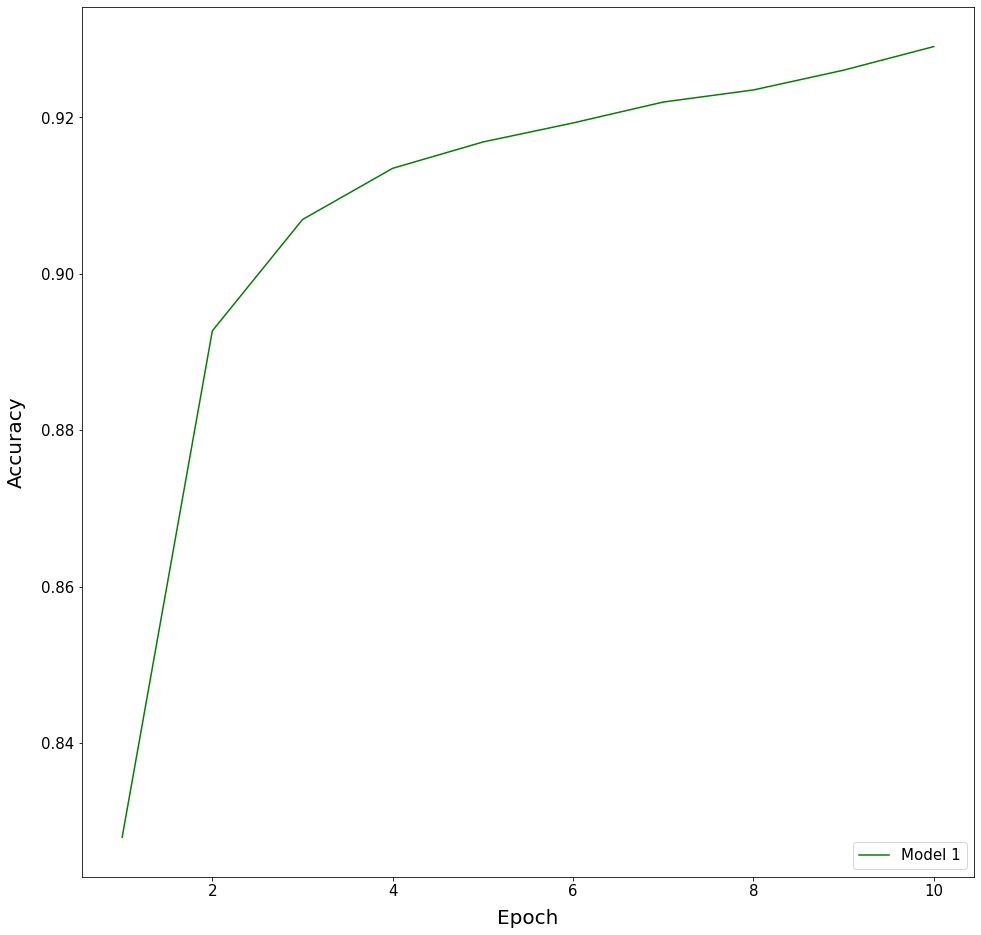

In [109]:
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.figure(figsize=(16, 16))
loss1 = history.history['loss']
val_loss = history.history['val_loss']
accuracy1 = history.history['accuracy']
print("First model: 2 Conv-Maxpool + 2 Dense")
plt.plot(np.linspace(1, 10, 10), accuracy, 'g')
plt.xlabel("Epoch", fontsize = 20, labelpad = 10)
plt.ylabel("Accuracy", fontsize = 20, labelpad = 15)
plt.legend(['Model 1'], loc = 'lower right', prop = {'size': 15})
print("First model: Loss of final step: {}, Accuracy of final step: {}".format(loss[-1], accuracy[-1]))
plt.savefig("First")

In [ ]:
net_3conv_2dense = models.Sequential([
      layers.Conv2D(5, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1), kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Conv2D(3, kernel_size = (3, 3), activation = 'relu', kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Conv2D(2, kernel_size = (3, 3), activation = 'relu', kernel_initializer=keras.initializers.GlorotNormal()),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(5, activation= 'relu'),
      layers.Dense(2, activation= 'sigmoid')
])

net_3conv_2dense.summary()

net_3conv_2dense.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 5)         50        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 3)         138       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 3)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 2)           56        
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 2)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18)               

In [ ]:
history2 = net_3conv_2dense.fit(train_images, train_labels,
                  epochs = 10, verbose = 1,
                  validation_data=(val_images, val_labels))

Epoch 1/10
1719/1719 [==============================] - 23s 14ms/step - loss: 0.4685 - accuracy: 0.7682 - val_loss: 0.3002 - val_accuracy: 0.8817
Epoch 2/10
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3397 - accuracy: 0.8516 - val_loss: 0.2496 - val_accuracy: 0.9070
Epoch 3/10
1719/1719 [==============================] - 23s 14ms/step - loss: 0.3150 - accuracy: 0.8649 - val_loss: 0.2315 - val_accuracy: 0.9136
Epoch 4/10
1719/1719 [==============================] - 23s 14ms/step - loss: 0.2953 - accuracy: 0.8774 - val_loss: 0.2191 - val_accuracy: 0.9160
Epoch 5/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.2796 - accuracy: 0.8866 - val_loss: 0.1992 - val_accuracy: 0.9268
Epoch 6/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.2582 - accuracy: 0.8971 - val_loss: 0.1842 - val_accuracy: 0.9333
Epoch 7/10
1719/1719 [==============================] - 23s 14ms/step - loss: 0.2416 - accuracy: 0.9048 - val_loss: 0.1821 -

First model: 2 Conv-Maxpool + 2 Dense
Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense
First model: Loss of final step: 0.18856820464134216, Accuracy of final step: 0.9290545582771301
Second model: Loss of final step: 0.2224530130624771, Accuracy of final step: 0.9129818081855774


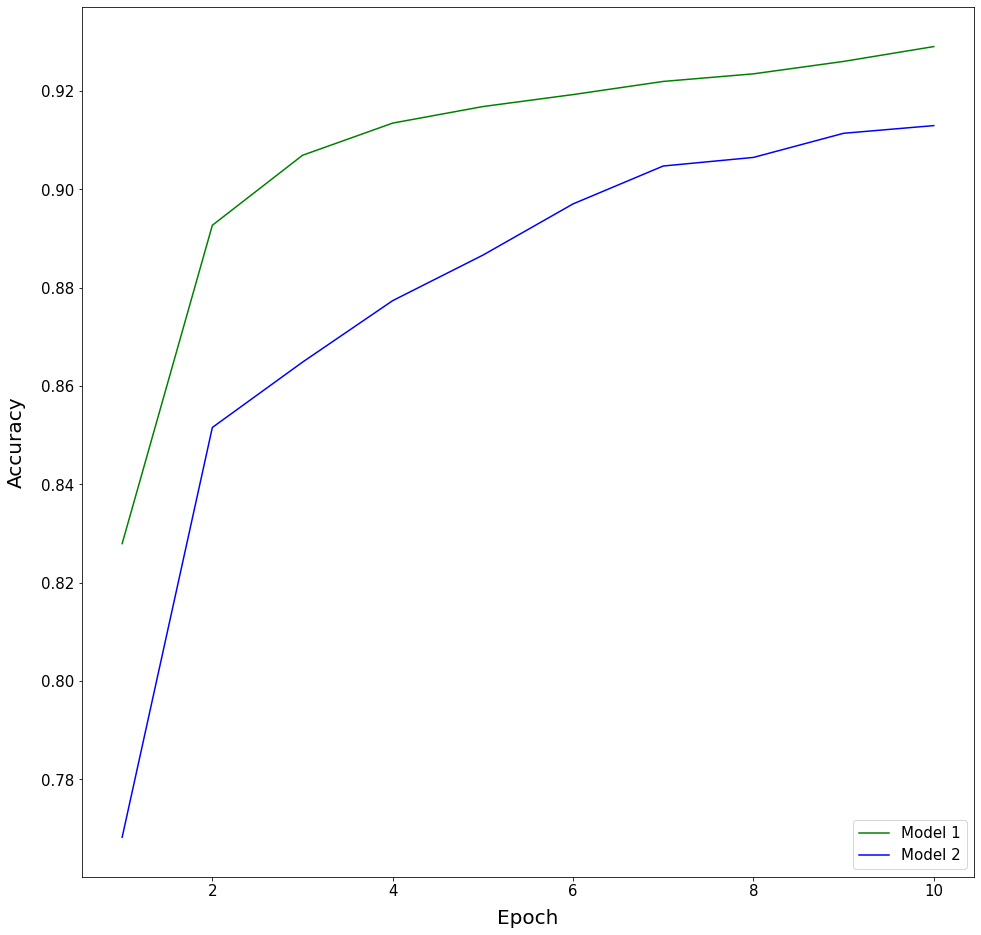

In [ ]:
plt.figure(figsize=(16, 16))
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
accuracy2 = history2.history['accuracy']
print("First model: 2 Conv-Maxpool + 2 Dense")
print("Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense")
plt.plot(np.linspace(1, 10, 10), accuracy, 'g')
plt.plot(np.linspace(1, 10, 10), accuracy2, 'b')
plt.xlabel("Epoch", fontsize = 20, labelpad = 10)
plt.ylabel("Accuracy", fontsize = 20, labelpad = 15)
plt.legend(['Model 1', 'Model 2'], loc = 'lower right', prop = {'size': 15})
print("First model: Loss of final step: {}, Accuracy of final step: {}".format(loss[-1], accuracy[-1]))
print("Second model: Loss of final step: {}, Accuracy of final step: {}".format(loss2[-1], accuracy2[-1]))

plt.savefig("Second")

In [ ]:
net_2conv_3dense = models.Sequential([
      layers.Conv2D(5, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1), kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Conv2D(3, kernel_size = (3, 3), activation = 'relu', kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(10, activation= 'relu'),
      layers.Dense(5, activation= 'relu'),
      layers.Dense(2, activation= 'sigmoid')
])

net_2conv_3dense.summary()

net_2conv_3dense.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 5)         50        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 3)         138       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 3)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 3)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 75)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [ ]:
history3 = net_2conv_3dense.fit(train_images, train_labels,
                  epochs = 10, verbose = 1,
                  validation_data=(val_images, val_labels))

Epoch 1/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.3316 - accuracy: 0.8638 - val_loss: 0.1278 - val_accuracy: 0.9574
Epoch 2/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.1518 - accuracy: 0.9462 - val_loss: 0.0905 - val_accuracy: 0.9685
Epoch 3/10
1719/1719 [==============================] - 24s 14ms/step - loss: 0.1301 - accuracy: 0.9534 - val_loss: 0.0809 - val_accuracy: 0.9723
Epoch 4/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1158 - accuracy: 0.9595 - val_loss: 0.0733 - val_accuracy: 0.9744
Epoch 5/10
1719/1719 [==============================] - 24s 14ms/step - loss: 0.1085 - accuracy: 0.9618 - val_loss: 0.0704 - val_accuracy: 0.9758
Epoch 6/10
1719/1719 [==============================] - 23s 14ms/step - loss: 0.1019 - accuracy: 0.9646 - val_loss: 0.0677 - val_accuracy: 0.9772
Epoch 7/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.0991 - accuracy: 0.9643 - val_loss: 0.0623 -

First model: 2 Conv-Maxpool + 2 Dense
Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense
Third model: 2 Conv-Maxpool + 3 Dense
First model: Loss of final step: 0.18856820464134216, Accuracy of final step: 0.9290545582771301
Second model: Loss of final step: 0.2224530130624771, Accuracy of final step: 0.9129818081855774
Third model: Loss of final step: 0.08941951394081116, Accuracy of final step: 0.969036340713501


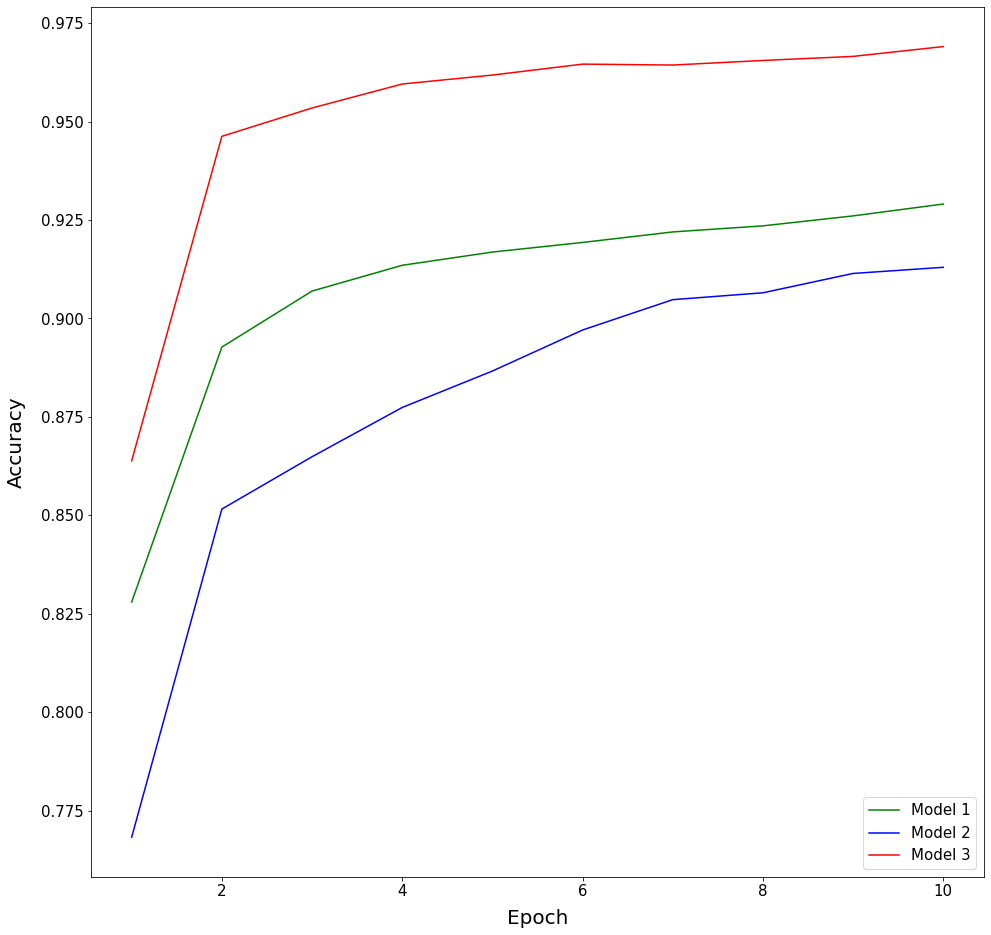

In [ ]:
plt.figure(figsize=(16, 16))
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
accuracy3 = history3.history['accuracy']
print("First model: 2 Conv-Maxpool + 2 Dense")
print("Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense")
print("Third model: 2 Conv-Maxpool + 3 Dense")
plt.plot(np.linspace(1, 10, 10), accuracy, 'g')
plt.plot(np.linspace(1, 10, 10), accuracy2, 'b')
plt.plot(np.linspace(1, 10, 10), accuracy3, 'r')
plt.xlabel("Epoch", fontsize = 20, labelpad = 10)
plt.ylabel("Accuracy", fontsize = 20, labelpad = 15)
plt.legend(['Model 1', 'Model 2', 'Model 3'], loc = 'lower right', prop = {'size': 15})
print("First model: Loss of final step: {}, Accuracy of final step: {}".format(loss[-1], accuracy[-1]))
print("Second model: Loss of final step: {}, Accuracy of final step: {}".format(loss2[-1], accuracy2[-1]))
print("Third model: Loss of final step: {}, Accuracy of final step: {}".format(loss3[-1], accuracy3[-1]))

plt.savefig("Third")

In [ ]:
net_2conv_stride2_2dense = models.Sequential([
      layers.Conv2D(5, kernel_size = (3, 3), strides=(2,2), activation = 'relu', input_shape = (28, 28, 1), kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Conv2D(2, kernel_size = (3, 3), strides=(2,2), activation = 'relu', kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(5, activation= 'relu'),
      layers.Dense(2, activation= 'sigmoid')
])

net_2conv_stride2_2dense.summary()

net_2conv_stride2_2dense.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 13, 13, 5)         50        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 5)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 2)           92        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 2)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 1, 2)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [ ]:
history4 = net_2conv_stride2_2dense.fit(train_images, train_labels,
                  epochs = 10, verbose = 1,
                  validation_data=(val_images, val_labels))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5456 - accuracy: 0.7386 - val_loss: 0.4257 - val_accuracy: 0.8317
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4501 - accuracy: 0.8016 - val_loss: 0.3758 - val_accuracy: 0.8567
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4274 - accuracy: 0.8155 - val_loss: 0.3509 - val_accuracy: 0.8637
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4190 - accuracy: 0.8209 - val_loss: 0.3396 - val_accuracy: 0.8728
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4088 - accuracy: 0.8275 - val_loss: 0.3311 - val_accuracy: 0.8803
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4014 - accuracy: 0.8334 - val_loss: 0.3217 - val_accuracy: 0.8832
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3951 - accuracy: 0.8358 - val_loss: 0.3168 - val_accuracy:

First model: 2 Conv-Maxpool + 2 Dense
Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense
Third model: 2 Conv-Maxpool + 3 Dense
Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense
First model: Loss of final step: 0.18856820464134216, Accuracy of final step: 0.9290545582771301
Second model: Loss of final step: 0.2224530130624771, Accuracy of final step: 0.9129818081855774
Third model: Loss of final step: 0.08941951394081116, Accuracy of final step: 0.969036340713501
Fourth model: Loss of final step: 0.3837720453739166, Accuracy of final step: 0.8432000279426575


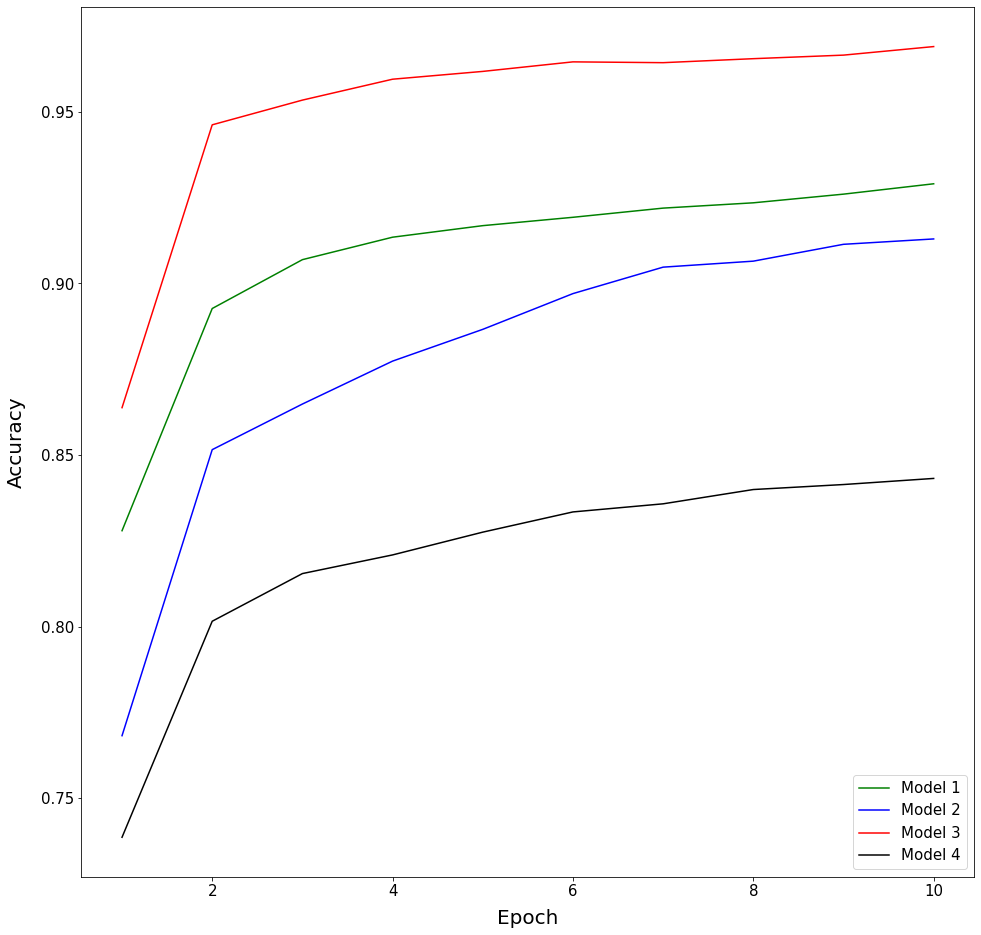

In [ ]:
plt.figure(figsize=(16, 16))
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']
accuracy4 = history4.history['accuracy']
print("First model: 2 Conv-Maxpool + 2 Dense")
print("Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense")
print("Third model: 2 Conv-Maxpool + 3 Dense")
print("Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense")
plt.plot(np.linspace(1, 10, 10), accuracy, 'g')
plt.plot(np.linspace(1, 10, 10), accuracy2, 'b')
plt.plot(np.linspace(1, 10, 10), accuracy3, 'r')
plt.plot(np.linspace(1, 10, 10), accuracy4, 'black')
plt.xlabel("Epoch", fontsize = 20, labelpad = 10)
plt.ylabel("Accuracy", fontsize = 20, labelpad = 15)
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4'], loc = 'lower right', prop = {'size': 15})
print("First model: Loss of final step: {}, Accuracy of final step: {}".format(loss[-1], accuracy[-1]))
print("Second model: Loss of final step: {}, Accuracy of final step: {}".format(loss2[-1], accuracy2[-1]))
print("Third model: Loss of final step: {}, Accuracy of final step: {}".format(loss3[-1], accuracy3[-1]))
print("Fourth model: Loss of final step: {}, Accuracy of final step: {}".format(loss4[-1], accuracy4[-1]))
plt.savefig("Fourth")

In [ ]:
net_2conv_kernel5_2dense = models.Sequential([
      layers.Conv2D(5, kernel_size = (5, 5), activation = 'relu', input_shape = (28, 28, 1), kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Conv2D(2, kernel_size = (5, 5), activation = 'relu', kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(5, activation= 'relu'),
      layers.Dense(2, activation= 'sigmoid')
])

net_2conv_kernel5_2dense.summary()

net_2conv_kernel5_2dense.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 5)         130       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 5)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 2)           252       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 2)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 2)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                

In [ ]:
history5 = net_2conv_kernel5_2dense.fit(train_images, train_labels,
                  epochs = 10, verbose = 1,
                  validation_data=(val_images, val_labels))

Epoch 1/10
1719/1719 [==============================] - 27s 16ms/step - loss: 0.2914 - accuracy: 0.8777 - val_loss: 0.1452 - val_accuracy: 0.9467
Epoch 2/10
1719/1719 [==============================] - 27s 16ms/step - loss: 0.1611 - accuracy: 0.9404 - val_loss: 0.1198 - val_accuracy: 0.9561
Epoch 3/10
1719/1719 [==============================] - 27s 16ms/step - loss: 0.1360 - accuracy: 0.9501 - val_loss: 0.1098 - val_accuracy: 0.9606
Epoch 4/10
1719/1719 [==============================] - 27s 16ms/step - loss: 0.1258 - accuracy: 0.9538 - val_loss: 0.1108 - val_accuracy: 0.9601
Epoch 5/10
1719/1719 [==============================] - 27s 16ms/step - loss: 0.1226 - accuracy: 0.9555 - val_loss: 0.1105 - val_accuracy: 0.9602
Epoch 6/10
1719/1719 [==============================] - 27s 16ms/step - loss: 0.1154 - accuracy: 0.9586 - val_loss: 0.0897 - val_accuracy: 0.9687
Epoch 7/10
1719/1719 [==============================] - 27s 16ms/step - loss: 0.1099 - accuracy: 0.9603 - val_loss: 0.0913 -

First model: 2 Conv-Maxpool + 2 Dense
Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense
Third model: 2 Conv-Maxpool + 3 Dense
Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense
Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense
First model: Loss of final step: 0.18856820464134216, Accuracy of final step: 0.9290545582771301
Second model: Loss of final step: 0.2224530130624771, Accuracy of final step: 0.9129818081855774
Third model: Loss of final step: 0.08941951394081116, Accuracy of final step: 0.969036340713501
Fourth model: Loss of final step: 0.3837720453739166, Accuracy of final step: 0.8432000279426575
Fifth model: Loss of final step: 0.09802280366420746, Accuracy of final step: 0.965399980545044


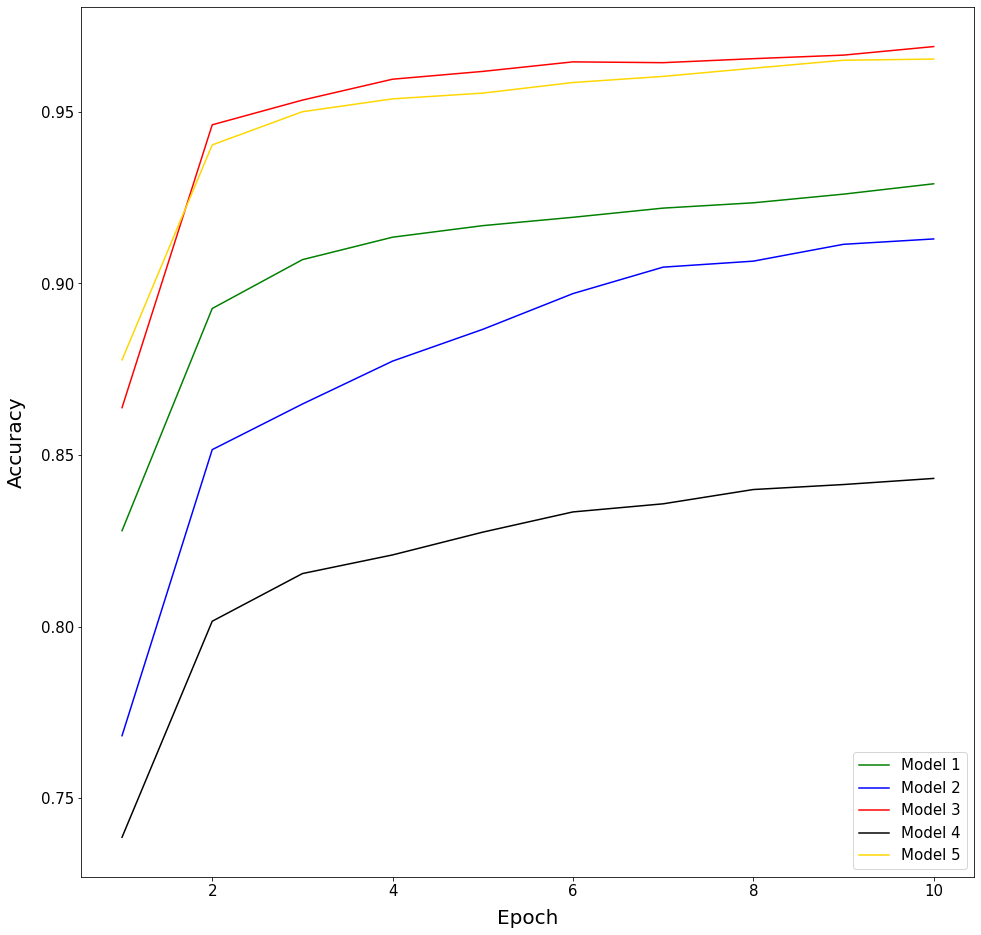

In [ ]:
plt.figure(figsize=(16, 16))
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']
accuracy5 = history5.history['accuracy']
print("First model: 2 Conv-Maxpool + 2 Dense")
print("Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense")
print("Third model: 2 Conv-Maxpool + 3 Dense")
print("Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense")
print("Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense")
plt.plot(np.linspace(1, 10, 10), accuracy, 'g')
plt.plot(np.linspace(1, 10, 10), accuracy2, 'b')
plt.plot(np.linspace(1, 10, 10), accuracy3, 'r')
plt.plot(np.linspace(1, 10, 10), accuracy4, 'black')
plt.plot(np.linspace(1, 10, 10), accuracy5, 'gold')
plt.xlabel("Epoch", fontsize = 20, labelpad = 10)
plt.ylabel("Accuracy", fontsize = 20, labelpad = 15)
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], loc = 'lower right', prop = {'size': 15})
print("First model: Loss of final step: {}, Accuracy of final step: {}".format(loss[-1], accuracy[-1]))
print("Second model: Loss of final step: {}, Accuracy of final step: {}".format(loss2[-1], accuracy2[-1]))
print("Third model: Loss of final step: {}, Accuracy of final step: {}".format(loss3[-1], accuracy3[-1]))
print("Fourth model: Loss of final step: {}, Accuracy of final step: {}".format(loss4[-1], accuracy4[-1]))
print("Fifth model: Loss of final step: {}, Accuracy of final step: {}".format(loss5[-1], accuracy5[-1]))

plt.savefig("Fifth")

In [ ]:
net_2conv_rmsprop_2dense = models.Sequential([
      layers.Conv2D(5, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1), kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Conv2D(2, kernel_size = (3, 3), activation = 'relu', kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(5, activation= 'relu'),
      layers.Dense(2, activation= 'sigmoid')
])

net_2conv_rmsprop_2dense.summary()

net_2conv_rmsprop_2dense.compile(optimizer = "rmsprop", loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 5)         50        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 2)         92        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 2)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 2)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                

In [ ]:
history6 = net_2conv_rmsprop_2dense.fit(train_images, train_labels,
                  epochs = 10, verbose = 1,
                  validation_data=(val_images, val_labels))

Epoch 1/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.4215 - accuracy: 0.8019 - val_loss: 0.2157 - val_accuracy: 0.9284
Epoch 2/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.2332 - accuracy: 0.9075 - val_loss: 0.1488 - val_accuracy: 0.9470
Epoch 3/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1985 - accuracy: 0.9218 - val_loss: 0.1348 - val_accuracy: 0.9508
Epoch 4/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.1831 - accuracy: 0.9288 - val_loss: 0.1396 - val_accuracy: 0.9475
Epoch 5/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.1739 - accuracy: 0.9331 - val_loss: 0.1212 - val_accuracy: 0.9561
Epoch 6/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.1662 - accuracy: 0.9348 - val_loss: 0.1157 - val_accuracy: 0.9552
Epoch 7/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1562 - accuracy: 0.9396 - val_loss: 0.1084 -

First model: 2 Conv-Maxpool + 2 Dense
Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense
Third model: 2 Conv-Maxpool + 3 Dense
Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense
Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense
Sixth model: 2 Conv-Maxpool + 2 Dense + RMSProp
First model: Loss of final step: 0.18856820464134216, Accuracy of final step: 0.9290545582771301
Second model: Loss of final step: 0.2224530130624771, Accuracy of final step: 0.9129818081855774
Third model: Loss of final step: 0.08941951394081116, Accuracy of final step: 0.969036340713501
Fourth model: Loss of final step: 0.3837720453739166, Accuracy of final step: 0.8432000279426575
Fifth model: Loss of final step: 0.09802280366420746, Accuracy of final step: 0.965399980545044
Sixth model: Loss of final step: 0.14072714745998383, Accuracy of final step: 0.9461091160774231


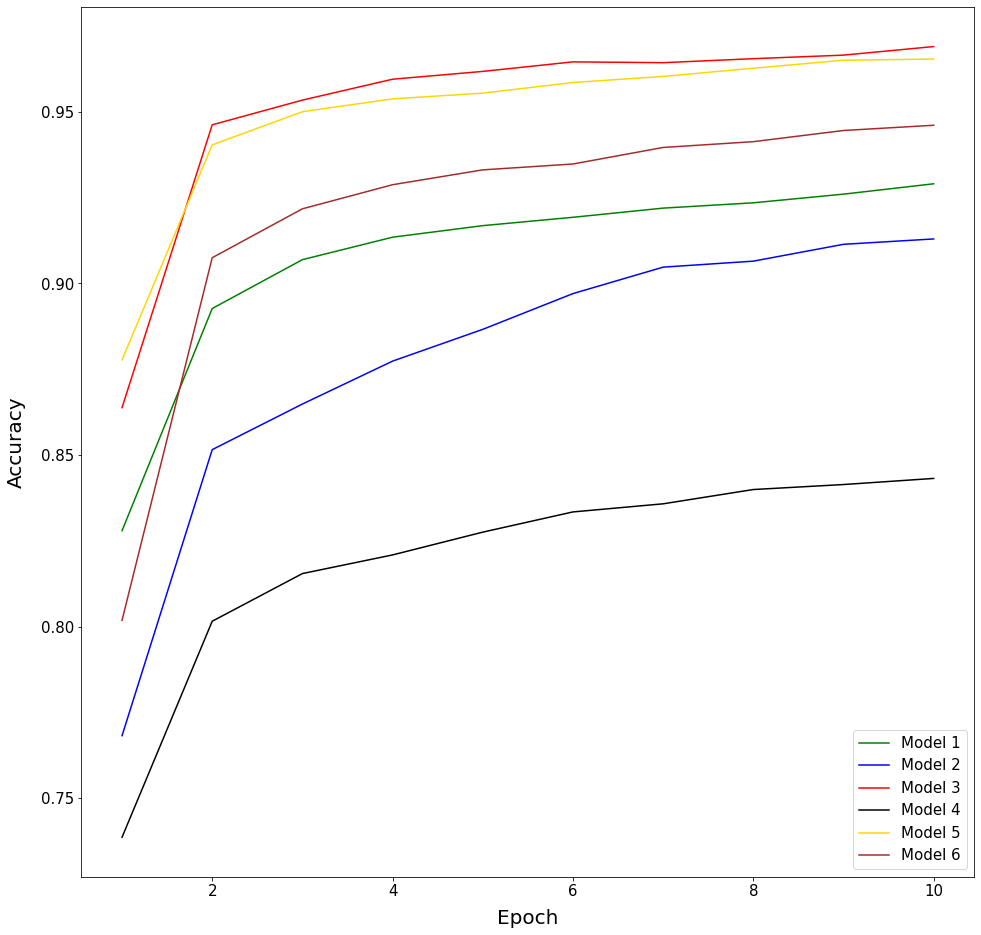

In [ ]:
plt.figure(figsize=(16, 16))
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']
accuracy6 = history6.history['accuracy']
print("First model: 2 Conv-Maxpool + 2 Dense")
print("Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense")
print("Third model: 2 Conv-Maxpool + 3 Dense")
print("Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense")
print("Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense")
print("Sixth model: 2 Conv-Maxpool + 2 Dense + RMSProp")
plt.plot(np.linspace(1, 10, 10), accuracy, 'g')
plt.plot(np.linspace(1, 10, 10), accuracy2, 'b')
plt.plot(np.linspace(1, 10, 10), accuracy3, 'r')
plt.plot(np.linspace(1, 10, 10), accuracy4, 'black')
plt.plot(np.linspace(1, 10, 10), accuracy5, 'gold')
plt.plot(np.linspace(1, 10, 10), accuracy6, 'brown')
plt.xlabel("Epoch", fontsize = 20, labelpad = 10)
plt.ylabel("Accuracy", fontsize = 20, labelpad = 15)
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6'], loc = 'lower right', prop = {'size': 15})
print("First model: Loss of final step: {}, Accuracy of final step: {}".format(loss[-1], accuracy[-1]))
print("Second model: Loss of final step: {}, Accuracy of final step: {}".format(loss2[-1], accuracy2[-1]))
print("Third model: Loss of final step: {}, Accuracy of final step: {}".format(loss3[-1], accuracy3[-1]))
print("Fourth model: Loss of final step: {}, Accuracy of final step: {}".format(loss4[-1], accuracy4[-1]))
print("Fifth model: Loss of final step: {}, Accuracy of final step: {}".format(loss5[-1], accuracy5[-1]))
print("Sixth model: Loss of final step: {}, Accuracy of final step: {}".format(loss6[-1], accuracy6[-1]))

plt.savefig("Sixth")

In [ ]:
net_2conv_MSE_2dense = models.Sequential([
      layers.Conv2D(5, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1), kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Conv2D(2, kernel_size = (3, 3), activation = 'relu', kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(5, activation= 'relu'),
      layers.Dense(2, activation= 'sigmoid')
])

net_2conv_MSE_2dense.summary()

net_2conv_MSE_2dense.compile(optimizer = "adam", loss = 'mse', metrics = ['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 5)         50        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 2)         92        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 2)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 2)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 5)                

In [ ]:
history7 = net_2conv_MSE_2dense.fit(train_images, train_labels,
                  epochs = 10, verbose = 1,
                  validation_data=(val_images, val_labels))

Epoch 1/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1454 - accuracy: 0.7947 - val_loss: 0.0790 - val_accuracy: 0.9000
Epoch 2/10
 798/1719 [============>.................] - ETA: 11s - loss: 0.0902 - accuracy: 0.8802

First model: 2 Conv-Maxpool + 2 Dense
Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense
Third model: 2 Conv-Maxpool + 3 Dense
Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense
Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense
Sixth model: 2 Conv-Maxpool + 2 Dense + RMSProp
Seventh model: 2 Conv-Maxpool + 2 Dense + MSE
First model: Loss of final step: 0.18856820464134216, Accuracy of final step: 0.9290545582771301
Second model: Loss of final step: 0.2224530130624771, Accuracy of final step: 0.9129818081855774
Third model: Loss of final step: 0.08941951394081116, Accuracy of final step: 0.969036340713501
Fourth model: Loss of final step: 0.3837720453739166, Accuracy of final step: 0.8432000279426575
Fifth model: Loss of final step: 0.09802280366420746, Accuracy of final step: 0.965399980545044
Sixth model: Loss of final step: 0.14072714745998383, Accuracy of final step: 0.9461091160774231
Seventh model: Loss of final step: 0.037958886474370956, Accuracy of final step: 0.950745463

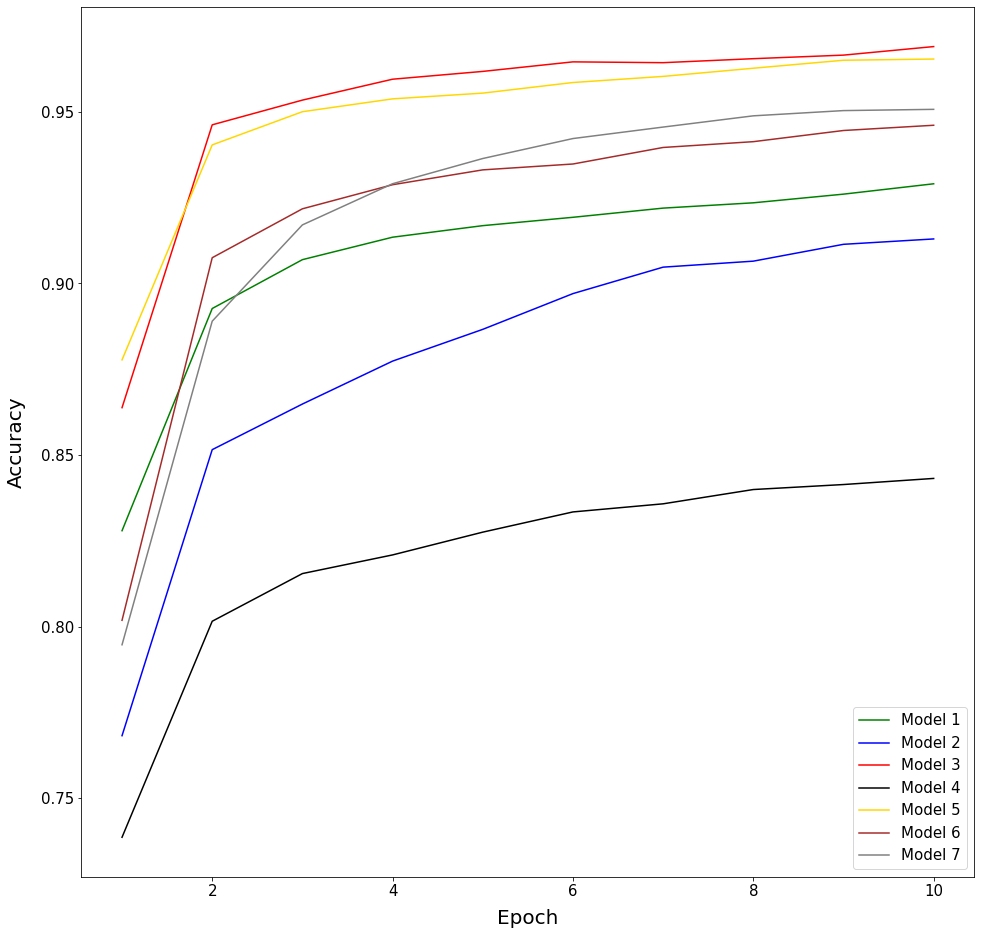

In [ ]:
plt.figure(figsize=(16, 16))
loss7 = history7.history['loss']
val_loss7 = history7.history['val_loss']
accuracy7 = history7.history['accuracy']
print("First model: 2 Conv-Maxpool + 2 Dense")
print("Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense")
print("Third model: 2 Conv-Maxpool + 3 Dense")
print("Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense")
print("Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense")
print("Sixth model: 2 Conv-Maxpool + 2 Dense + RMSProp")
print("Seventh model: 2 Conv-Maxpool + 2 Dense + MSE")
plt.plot(np.linspace(1, 10, 10), accuracy, 'g')
plt.plot(np.linspace(1, 10, 10), accuracy2, 'b')
plt.plot(np.linspace(1, 10, 10), accuracy3, 'r')
plt.plot(np.linspace(1, 10, 10), accuracy4, 'black')
plt.plot(np.linspace(1, 10, 10), accuracy5, 'gold')
plt.plot(np.linspace(1, 10, 10), accuracy6, 'brown')
plt.plot(np.linspace(1, 10, 10), accuracy7, 'grey')
plt.xlabel("Epoch", fontsize = 20, labelpad = 10)
plt.ylabel("Accuracy", fontsize = 20, labelpad = 15)
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7'], loc = 'lower right', prop = {'size': 15})
print("First model: Loss of final step: {}, Accuracy of final step: {}".format(loss[-1], accuracy[-1]))
print("Second model: Loss of final step: {}, Accuracy of final step: {}".format(loss2[-1], accuracy2[-1]))
print("Third model: Loss of final step: {}, Accuracy of final step: {}".format(loss3[-1], accuracy3[-1]))
print("Fourth model: Loss of final step: {}, Accuracy of final step: {}".format(loss4[-1], accuracy4[-1]))
print("Fifth model: Loss of final step: {}, Accuracy of final step: {}".format(loss5[-1], accuracy5[-1]))
print("Sixth model: Loss of final step: {}, Accuracy of final step: {}".format(loss6[-1], accuracy6[-1]))
print("Seventh model: Loss of final step: {}, Accuracy of final step: {}".format(loss7[-1], accuracy7[-1]))

plt.savefig("Seventh")

In [ ]:
net_2conv_dropthalf_2dense = models.Sequential([
      layers.Conv2D(5, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1), kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Conv2D(2, kernel_size = (3, 3), activation = 'relu', kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Dropout(0.5),
      layers.Flatten(),
      layers.Dense(5, activation= 'relu'),
      layers.Dense(2, activation= 'sigmoid')
])

net_2conv_dropthalf_2dense.summary()

net_2conv_dropthalf_2dense.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 5)         50        
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 2)         92        
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 2)           0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 5, 2)           0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 50)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 5)               

In [ ]:
history8 = net_2conv_dropthalf_2dense.fit(train_images, train_labels,
                  epochs = 10, verbose = 1,
                  validation_data=(val_images, val_labels))

Epoch 1/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.5082 - accuracy: 0.7408 - val_loss: 0.3096 - val_accuracy: 0.8850
Epoch 2/10
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3942 - accuracy: 0.8183 - val_loss: 0.2740 - val_accuracy: 0.8974
Epoch 3/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.3676 - accuracy: 0.8343 - val_loss: 0.2400 - val_accuracy: 0.9120
Epoch 4/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.3472 - accuracy: 0.8456 - val_loss: 0.2220 - val_accuracy: 0.9203
Epoch 5/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.3389 - accuracy: 0.8502 - val_loss: 0.2104 - val_accuracy: 0.9258
Epoch 6/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.3306 - accuracy: 0.8561 - val_loss: 0.2131 - val_accuracy: 0.9261
Epoch 7/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.3197 - accuracy: 0.8608 - val_loss: 0.2060 -

First model: 2 Conv-Maxpool + 2 Dense
Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense
Third model: 2 Conv-Maxpool + 3 Dense
Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense
Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense
Sixth model: 2 Conv-Maxpool + 2 Dense + RMSProp
Seventh model: 2 Conv-Maxpool + 2 Dense + MSE
Eighth model: 2 Conv-Maxpool + 2 Dense + Dropout 0.5
First model: Loss of final step: 0.18856820464134216, Accuracy of final step: 0.9290545582771301
Second model: Loss of final step: 0.2224530130624771, Accuracy of final step: 0.9129818081855774
Third model: Loss of final step: 0.08941951394081116, Accuracy of final step: 0.969036340713501
Fourth model: Loss of final step: 0.3837720453739166, Accuracy of final step: 0.8432000279426575
Fifth model: Loss of final step: 0.09802280366420746, Accuracy of final step: 0.965399980545044
Sixth model: Loss of final step: 0.14072714745998383, Accuracy of final step: 0.9461091160774231
Seventh model: Loss of final step: 0.03

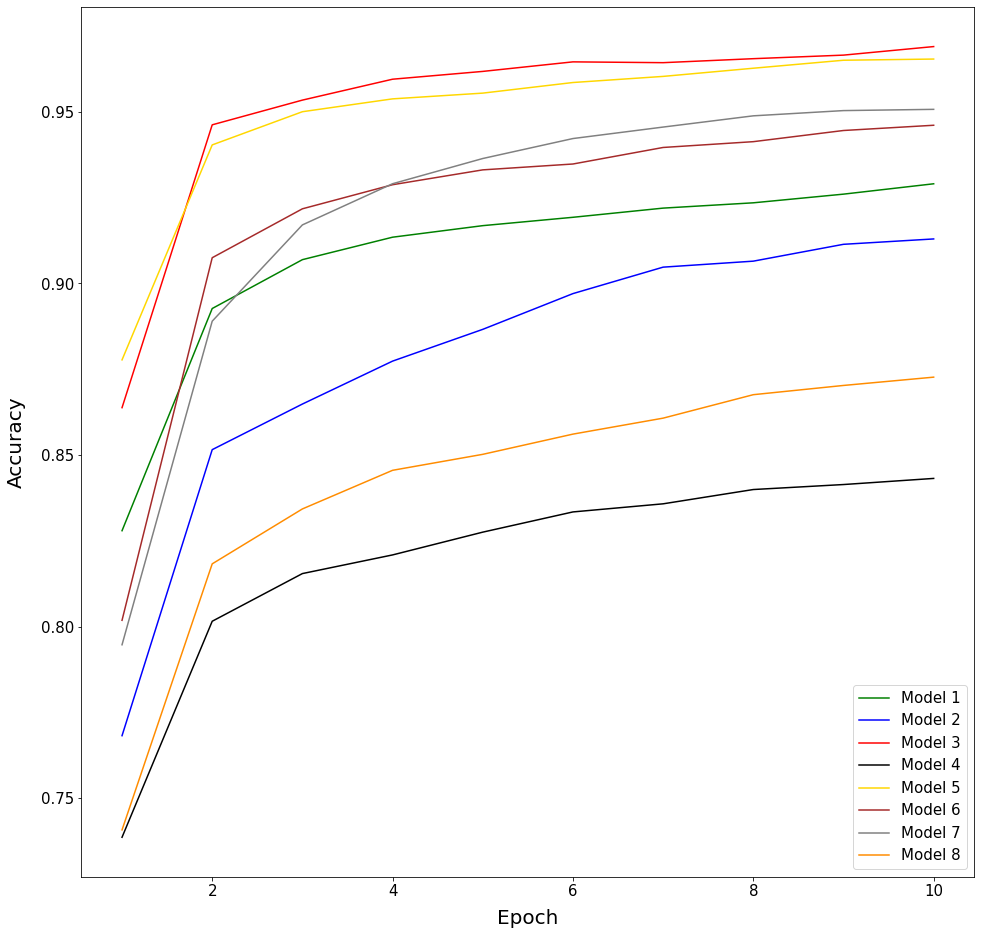

In [ ]:
plt.figure(figsize=(16, 16))
loss8 = history8.history['loss']
val_loss8 = history8.history['val_loss']
accuracy8 = history8.history['accuracy']
print("First model: 2 Conv-Maxpool + 2 Dense")
print("Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense")
print("Third model: 2 Conv-Maxpool + 3 Dense")
print("Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense")
print("Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense")
print("Sixth model: 2 Conv-Maxpool + 2 Dense + RMSProp")
print("Seventh model: 2 Conv-Maxpool + 2 Dense + MSE")
print("Eighth model: 2 Conv-Maxpool + 2 Dense + Dropout 0.5")
plt.plot(np.linspace(1, 10, 10), accuracy, 'g')
plt.plot(np.linspace(1, 10, 10), accuracy2, 'b')
plt.plot(np.linspace(1, 10, 10), accuracy3, 'r')
plt.plot(np.linspace(1, 10, 10), accuracy4, 'black')
plt.plot(np.linspace(1, 10, 10), accuracy5, 'gold')
plt.plot(np.linspace(1, 10, 10), accuracy6, 'brown')
plt.plot(np.linspace(1, 10, 10), accuracy7, 'grey')
plt.plot(np.linspace(1, 10, 10), accuracy8, 'darkorange')
plt.xlabel("Epoch", fontsize = 20, labelpad = 10)
plt.ylabel("Accuracy", fontsize = 20, labelpad = 15)
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8'], loc = 'lower right', prop = {'size': 15})
print("First model: Loss of final step: {}, Accuracy of final step: {}".format(loss[-1], accuracy[-1]))
print("Second model: Loss of final step: {}, Accuracy of final step: {}".format(loss2[-1], accuracy2[-1]))
print("Third model: Loss of final step: {}, Accuracy of final step: {}".format(loss3[-1], accuracy3[-1]))
print("Fourth model: Loss of final step: {}, Accuracy of final step: {}".format(loss4[-1], accuracy4[-1]))
print("Fifth model: Loss of final step: {}, Accuracy of final step: {}".format(loss5[-1], accuracy5[-1]))
print("Sixth model: Loss of final step: {}, Accuracy of final step: {}".format(loss6[-1], accuracy6[-1]))
print("Seventh model: Loss of final step: {}, Accuracy of final step: {}".format(loss7[-1], accuracy7[-1]))
print("Eighth model: Loss of final step: {}, Accuracy of final step: {}".format(loss8[-1], accuracy8[-1]))

plt.savefig("Eight")

In [ ]:
net_2conv_LR_2dense = models.Sequential([
      layers.Conv2D(5, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1), kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Conv2D(2, kernel_size = (3, 3), activation = 'relu', kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(5, activation= 'relu'),
      layers.Dense(2, activation= 'sigmoid')
])

net_2conv_LR_2dense.summary()

net_2conv_LR_2dense.compile(optimizer = keras.optimizers.Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 5)         50        
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 11, 11, 2)         92        
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 2)           0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 5, 5, 2)           0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 50)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 5)               

In [ ]:
history9 = net_2conv_LR_2dense.fit(train_images, train_labels,
                  epochs = 10, verbose = 1,
                  validation_data=(val_images, val_labels))

Epoch 1/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.2992 - accuracy: 0.8813 - val_loss: 0.1761 - val_accuracy: 0.9334
Epoch 2/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1998 - accuracy: 0.9237 - val_loss: 0.1404 - val_accuracy: 0.9483
Epoch 3/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1807 - accuracy: 0.9327 - val_loss: 0.1316 - val_accuracy: 0.9522
Epoch 4/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1730 - accuracy: 0.9375 - val_loss: 0.1286 - val_accuracy: 0.9559
Epoch 5/10
1719/1719 [==============================] - 23s 14ms/step - loss: 0.1628 - accuracy: 0.9415 - val_loss: 0.1234 - val_accuracy: 0.9550
Epoch 6/10
1719/1719 [==============================] - 24s 14ms/step - loss: 0.1602 - accuracy: 0.9426 - val_loss: 0.1205 - val_accuracy: 0.9600
Epoch 7/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1539 - accuracy: 0.9455 - val_loss: 0.1354 -

First model: 2 Conv-Maxpool + 2 Dense
Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense
Third model: 2 Conv-Maxpool + 3 Dense
Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense
Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense
Sixth model: 2 Conv-Maxpool + 2 Dense + RMSProp
Seventh model: 2 Conv-Maxpool + 2 Dense + MSE
Eighth model: 2 Conv-Maxpool + 2 Dense + Dropout 0.5
Ninth model: 2 Conv-Maxpool + 2 Dense + LR 0.01
First model: Loss of final step: 0.18856820464134216, Accuracy of final step: 0.9290545582771301
Second model: Loss of final step: 0.2224530130624771, Accuracy of final step: 0.9129818081855774
Third model: Loss of final step: 0.08941951394081116, Accuracy of final step: 0.969036340713501
Fourth model: Loss of final step: 0.3837720453739166, Accuracy of final step: 0.8432000279426575
Fifth model: Loss of final step: 0.09802280366420746, Accuracy of final step: 0.965399980545044
Sixth model: Loss of final step: 0.14072714745998383, Accuracy of final step: 0.94610911

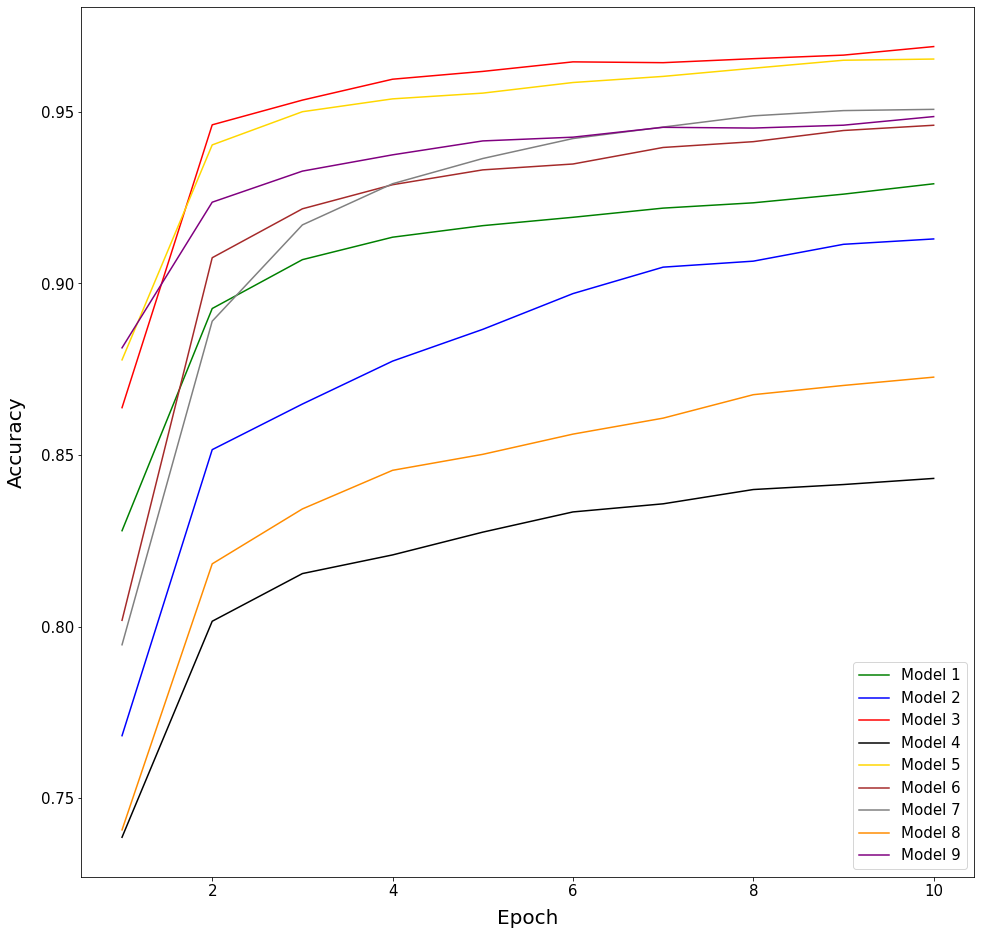

In [ ]:
plt.figure(figsize=(16, 16))
loss9 = history9.history['loss']
val_loss9 = history9.history['val_loss']
accuracy9 = history9.history['accuracy']
print("First model: 2 Conv-Maxpool + 2 Dense")
print("Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense")
print("Third model: 2 Conv-Maxpool + 3 Dense")
print("Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense")
print("Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense")
print("Sixth model: 2 Conv-Maxpool + 2 Dense + RMSProp")
print("Seventh model: 2 Conv-Maxpool + 2 Dense + MSE")
print("Eighth model: 2 Conv-Maxpool + 2 Dense + Dropout 0.5")
print("Ninth model: 2 Conv-Maxpool + 2 Dense + LR 0.01")
plt.plot(np.linspace(1, 10, 10), accuracy, 'g')
plt.plot(np.linspace(1, 10, 10), accuracy2, 'b')
plt.plot(np.linspace(1, 10, 10), accuracy3, 'r')
plt.plot(np.linspace(1, 10, 10), accuracy4, 'black')
plt.plot(np.linspace(1, 10, 10), accuracy5, 'gold')
plt.plot(np.linspace(1, 10, 10), accuracy6, 'brown')
plt.plot(np.linspace(1, 10, 10), accuracy7, 'grey')
plt.plot(np.linspace(1, 10, 10), accuracy8, 'darkorange')
plt.plot(np.linspace(1, 10, 10), accuracy9, 'purple')
plt.xlabel("Epoch", fontsize = 20, labelpad = 10)
plt.ylabel("Accuracy", fontsize = 20, labelpad = 15)
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9'], loc = 'lower right', prop = {'size': 15})
print("First model: Loss of final step: {}, Accuracy of final step: {}".format(loss[-1], accuracy[-1]))
print("Second model: Loss of final step: {}, Accuracy of final step: {}".format(loss2[-1], accuracy2[-1]))
print("Third model: Loss of final step: {}, Accuracy of final step: {}".format(loss3[-1], accuracy3[-1]))
print("Fourth model: Loss of final step: {}, Accuracy of final step: {}".format(loss4[-1], accuracy4[-1]))
print("Fifth model: Loss of final step: {}, Accuracy of final step: {}".format(loss5[-1], accuracy5[-1]))
print("Sixth model: Loss of final step: {}, Accuracy of final step: {}".format(loss6[-1], accuracy6[-1]))
print("Seventh model: Loss of final step: {}, Accuracy of final step: {}".format(loss7[-1], accuracy7[-1]))
print("Eighth model: Loss of final step: {}, Accuracy of final step: {}".format(loss8[-1], accuracy8[-1]))
print("Ninth model: Loss of final step: {}, Accuracy of final step: {}".format(loss9[-1], accuracy9[-1]))
plt.savefig("Ninth")

In [ ]:
net_2conv_filter_2dense = models.Sequential([
      layers.Conv2D(10, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1), kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Conv2D(10, kernel_size = (3, 3), activation = 'relu', kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(10, activation= 'relu'),
      layers.Dense(2, activation= 'sigmoid')
])

net_2conv_filter_2dense.summary()

net_2conv_filter_2dense.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 11, 11, 10)        910       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 10)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 5, 5, 10)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 250)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)              

In [ ]:
history10 = net_2conv_filter_2dense.fit(train_images, train_labels,
                  epochs = 10, verbose = 1,
                  validation_data=(val_images, val_labels))

Epoch 1/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.1844 - accuracy: 0.9273 - val_loss: 0.0719 - val_accuracy: 0.9748
Epoch 2/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.0755 - accuracy: 0.9735 - val_loss: 0.0515 - val_accuracy: 0.9827
Epoch 3/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.0609 - accuracy: 0.9790 - val_loss: 0.0433 - val_accuracy: 0.9840
Epoch 4/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.0522 - accuracy: 0.9821 - val_loss: 0.0420 - val_accuracy: 0.9849
Epoch 5/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.0465 - accuracy: 0.9838 - val_loss: 0.0388 - val_accuracy: 0.9872
Epoch 6/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.0441 - accuracy: 0.9842 - val_loss: 0.0378 - val_accuracy: 0.9871
Epoch 7/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.0416 - accuracy: 0.9854 - val_loss: 0.0328 -

First model: 2 Conv-Maxpool + 2 Dense
Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense
Third model: 2 Conv-Maxpool + 3 Dense
Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense
Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense
Sixth model: 2 Conv-Maxpool + 2 Dense + RMSProp
Seventh model: 2 Conv-Maxpool + 2 Dense + MSE
Eighth model: 2 Conv-Maxpool + 2 Dense + Dropout 0.5
Ninth model: 2 Conv-Maxpool + 2 Dense + LR 0.01
Tenth model: 2 Conv-Maxpool (5 - 5) + 2 Dense
First model: Loss of final step: 0.18856820464134216, Accuracy of final step: 0.9290545582771301
Second model: Loss of final step: 0.2224530130624771, Accuracy of final step: 0.9129818081855774
Third model: Loss of final step: 0.08941951394081116, Accuracy of final step: 0.969036340713501
Fourth model: Loss of final step: 0.3837720453739166, Accuracy of final step: 0.8432000279426575
Fifth model: Loss of final step: 0.09802280366420746, Accuracy of final step: 0.965399980545044
Sixth model: Loss of final step: 0.1407271

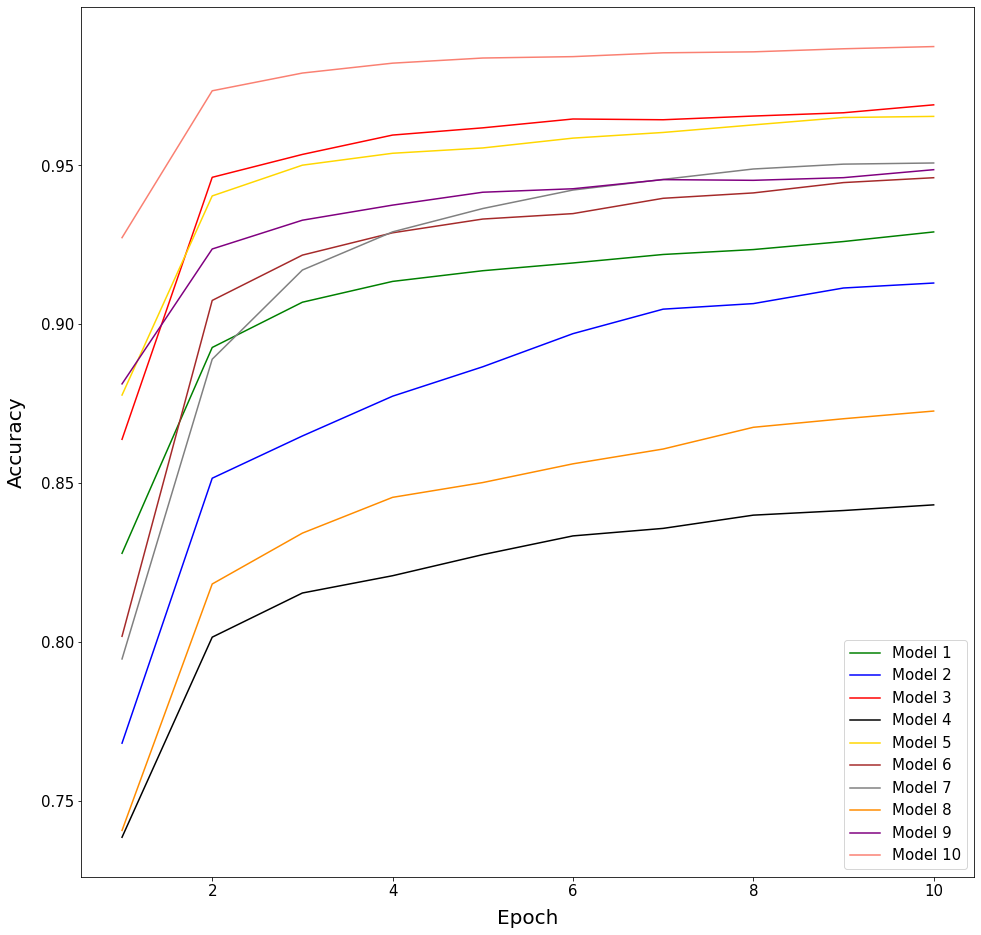

In [ ]:
plt.figure(figsize=(16, 16))
loss10 = history10.history['loss']
val_loss10 = history10.history['val_loss']
accuracy10 = history10.history['accuracy']
print("First model: 2 Conv-Maxpool + 2 Dense")
print("Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense")
print("Third model: 2 Conv-Maxpool + 3 Dense")
print("Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense")
print("Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense")
print("Sixth model: 2 Conv-Maxpool + 2 Dense + RMSProp")
print("Seventh model: 2 Conv-Maxpool + 2 Dense + MSE")
print("Eighth model: 2 Conv-Maxpool + 2 Dense + Dropout 0.5")
print("Ninth model: 2 Conv-Maxpool + 2 Dense + LR 0.01")
print("Tenth model: 2 Conv-Maxpool (5 - 5) + 2 Dense")
plt.plot(np.linspace(1, 10, 10), accuracy, 'g')
plt.plot(np.linspace(1, 10, 10), accuracy2, 'b')
plt.plot(np.linspace(1, 10, 10), accuracy3, 'r')
plt.plot(np.linspace(1, 10, 10), accuracy4, 'black')
plt.plot(np.linspace(1, 10, 10), accuracy5, 'gold')
plt.plot(np.linspace(1, 10, 10), accuracy6, 'brown')
plt.plot(np.linspace(1, 10, 10), accuracy7, 'grey')
plt.plot(np.linspace(1, 10, 10), accuracy8, 'darkorange')
plt.plot(np.linspace(1, 10, 10), accuracy9, 'purple')
plt.plot(np.linspace(1, 10, 10), accuracy10, 'salmon')
plt.xlabel("Epoch", fontsize = 20, labelpad = 10)
plt.ylabel("Accuracy", fontsize = 20, labelpad = 15)
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9', 'Model 10'], loc = 'lower right', prop = {'size': 15})
print("First model: Loss of final step: {}, Accuracy of final step: {}".format(loss[-1], accuracy[-1]))
print("Second model: Loss of final step: {}, Accuracy of final step: {}".format(loss2[-1], accuracy2[-1]))
print("Third model: Loss of final step: {}, Accuracy of final step: {}".format(loss3[-1], accuracy3[-1]))
print("Fourth model: Loss of final step: {}, Accuracy of final step: {}".format(loss4[-1], accuracy4[-1]))
print("Fifth model: Loss of final step: {}, Accuracy of final step: {}".format(loss5[-1], accuracy5[-1]))
print("Sixth model: Loss of final step: {}, Accuracy of final step: {}".format(loss6[-1], accuracy6[-1]))
print("Seventh model: Loss of final step: {}, Accuracy of final step: {}".format(loss7[-1], accuracy7[-1]))
print("Eighth model: Loss of final step: {}, Accuracy of final step: {}".format(loss8[-1], accuracy8[-1]))
print("Ninth model: Loss of final step: {}, Accuracy of final step: {}".format(loss9[-1], accuracy9[-1]))
print("Tenth model: Loss of final step: {}, Accuracy of final step: {}".format(loss10[-1], accuracy10[-1]))
plt.savefig("Tenth")

In [ ]:
net_2conv_epoch_2dense = models.Sequential([
      layers.Conv2D(5, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1), kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Conv2D(2, kernel_size = (3, 3), activation = 'relu', kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(5, activation= 'relu'),
      layers.Dense(2, activation= 'sigmoid')
])

net_2conv_epoch_2dense.summary()

net_2conv_epoch_2dense.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 5)         50        
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 11, 11, 2)         92        
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 5, 5, 2)           0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 5, 5, 2)           0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 50)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 5)               

In [ ]:
history11 = net_2conv_epoch_2dense.fit(train_images, train_labels,
                  epochs = 12, verbose = 1,
                  validation_data=(val_images, val_labels))

Epoch 1/12
1719/1719 [==============================] - 23s 13ms/step - loss: 0.3662 - accuracy: 0.8405 - val_loss: 0.2123 - val_accuracy: 0.9234
Epoch 2/12
1719/1719 [==============================] - 22s 13ms/step - loss: 0.2571 - accuracy: 0.8954 - val_loss: 0.1773 - val_accuracy: 0.9389
Epoch 3/12
1719/1719 [==============================] - 23s 13ms/step - loss: 0.2234 - accuracy: 0.9118 - val_loss: 0.1503 - val_accuracy: 0.9478
Epoch 4/12
1719/1719 [==============================] - 22s 13ms/step - loss: 0.2035 - accuracy: 0.9213 - val_loss: 0.1394 - val_accuracy: 0.9526
Epoch 5/12
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1914 - accuracy: 0.9274 - val_loss: 0.1295 - val_accuracy: 0.9555
Epoch 6/12
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1799 - accuracy: 0.9325 - val_loss: 0.1211 - val_accuracy: 0.9581
Epoch 7/12
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1729 - accuracy: 0.9345 - val_loss: 0.1199 -

First model: 2 Conv-Maxpool + 2 Dense
Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense
Third model: 2 Conv-Maxpool + 3 Dense
Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense
Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense
Sixth model: 2 Conv-Maxpool + 2 Dense + RMSProp
Seventh model: 2 Conv-Maxpool + 2 Dense + MSE
Eighth model: 2 Conv-Maxpool + 2 Dense + Dropout 0.5
Ninth model: 2 Conv-Maxpool + 2 Dense + LR 0.01
Tenth model: 2 Conv-Maxpool (5 - 5) + 2 Dense
Eleventh model: 2 Conv-Maxpool + 2 Dense + Double Epoch
First model: Loss of final step: 0.18856820464134216, Accuracy of final step: 0.9290545582771301
Second model: Loss of final step: 0.2224530130624771, Accuracy of final step: 0.9129818081855774
Third model: Loss of final step: 0.08941951394081116, Accuracy of final step: 0.969036340713501
Fourth model: Loss of final step: 0.3837720453739166, Accuracy of final step: 0.8432000279426575
Fifth model: Loss of final step: 0.09802280366420746, Accuracy of final step: 0.96

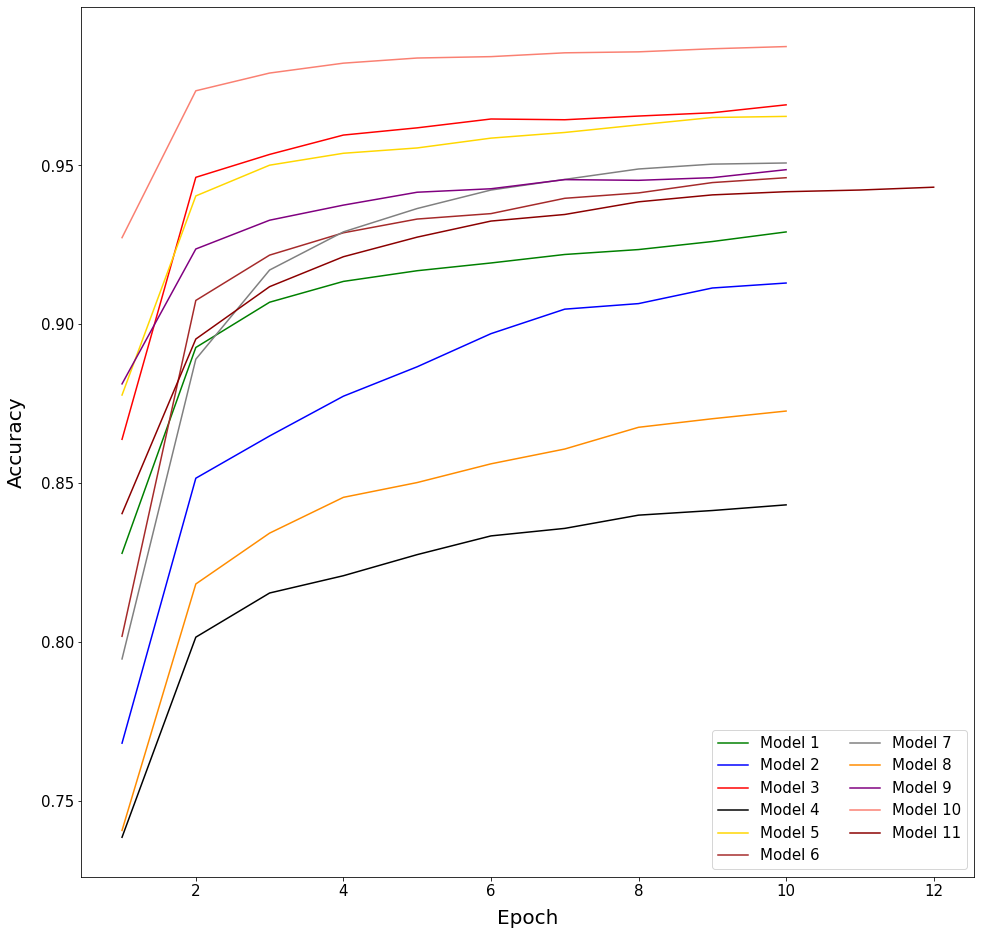

In [ ]:
plt.figure(figsize=(16, 16))
loss11 = history11.history['loss']
val_loss11 = history11.history['val_loss']
accuracy11 = history11.history['accuracy']
print("First model: 2 Conv-Maxpool + 2 Dense")
print("Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense")
print("Third model: 2 Conv-Maxpool + 3 Dense")
print("Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense")
print("Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense")
print("Sixth model: 2 Conv-Maxpool + 2 Dense + RMSProp")
print("Seventh model: 2 Conv-Maxpool + 2 Dense + MSE")
print("Eighth model: 2 Conv-Maxpool + 2 Dense + Dropout 0.5")
print("Ninth model: 2 Conv-Maxpool + 2 Dense + LR 0.01")
print("Tenth model: 2 Conv-Maxpool (5 - 5) + 2 Dense")
print("Eleventh model: 2 Conv-Maxpool + 2 Dense + Double Epoch")
plt.plot(np.linspace(1, 10, 10), accuracy, 'g')
plt.plot(np.linspace(1, 10, 10), accuracy2, 'b')
plt.plot(np.linspace(1, 10, 10), accuracy3, 'r')
plt.plot(np.linspace(1, 10, 10), accuracy4, 'black')
plt.plot(np.linspace(1, 10, 10), accuracy5, 'gold')
plt.plot(np.linspace(1, 10, 10), accuracy6, 'brown')
plt.plot(np.linspace(1, 10, 10), accuracy7, 'grey')
plt.plot(np.linspace(1, 10, 10), accuracy8, 'darkorange')
plt.plot(np.linspace(1, 10, 10), accuracy9, 'purple')
plt.plot(np.linspace(1, 10, 10), accuracy10, 'salmon')
plt.plot(np.linspace(1, 12, 12), accuracy11, 'darkred')
plt.xlabel("Epoch", fontsize = 20, labelpad = 10)
plt.ylabel("Accuracy", fontsize = 20, labelpad = 15)
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9', 'Model 10', 'Model 11'],
           loc = 'lower right', prop = {'size': 15}, ncol=2)
print("First model: Loss of final step: {}, Accuracy of final step: {}".format(loss[-1], accuracy[-1]))
print("Second model: Loss of final step: {}, Accuracy of final step: {}".format(loss2[-1], accuracy2[-1]))
print("Third model: Loss of final step: {}, Accuracy of final step: {}".format(loss3[-1], accuracy3[-1]))
print("Fourth model: Loss of final step: {}, Accuracy of final step: {}".format(loss4[-1], accuracy4[-1]))
print("Fifth model: Loss of final step: {}, Accuracy of final step: {}".format(loss5[-1], accuracy5[-1]))
print("Sixth model: Loss of final step: {}, Accuracy of final step: {}".format(loss6[-1], accuracy6[-1]))
print("Seventh model: Loss of final step: {}, Accuracy of final step: {}".format(loss7[-1], accuracy7[-1]))
print("Eighth model: Loss of final step: {}, Accuracy of final step: {}".format(loss8[-1], accuracy8[-1]))
print("Ninth model: Loss of final step: {}, Accuracy of final step: {}".format(loss9[-1], accuracy9[-1]))
print("Tenth model: Loss of final step: {}, Accuracy of final step: {}".format(loss10[-1], accuracy10[-1]))
print("Eleventh model: Loss of final step: {}, Accuracy of final step: {}".format(loss11[-1], accuracy11[-1]))

plt.savefig("Eleventh")

In [ ]:
net_2conv_Batch_2dense = models.Sequential([
      layers.Conv2D(5, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1), kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Conv2D(2, kernel_size = (3, 3), activation = 'relu', kernel_initializer=keras.initializers.GlorotNormal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.BatchNormalization(),
      layers.Dense(5, activation= 'relu'),
      layers.Dense(2, activation= 'sigmoid')
])

net_2conv_Batch_2dense.summary()

net_2conv_Batch_2dense.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 26, 26, 5)         50        
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 11, 11, 2)         92        
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 5, 5, 2)           0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 5, 5, 2)           0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 50)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)              

In [ ]:
history12 = net_2conv_Batch_2dense.fit(train_images, train_labels,
                  epochs = 10, verbose = 1,
                  validation_data=(val_images, val_labels))

Epoch 1/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.4254 - accuracy: 0.8395 - val_loss: 0.3303 - val_accuracy: 0.8959
Epoch 2/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.2696 - accuracy: 0.9107 - val_loss: 0.1745 - val_accuracy: 0.9548
Epoch 3/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.2267 - accuracy: 0.9188 - val_loss: 0.1459 - val_accuracy: 0.9571
Epoch 4/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.2072 - accuracy: 0.9244 - val_loss: 0.1665 - val_accuracy: 0.9398
Epoch 5/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1951 - accuracy: 0.9275 - val_loss: 0.1216 - val_accuracy: 0.9618
Epoch 6/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1825 - accuracy: 0.9315 - val_loss: 0.1068 - val_accuracy: 0.9656
Epoch 7/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1752 - accuracy: 0.9342 - val_loss: 0.1057 -

First model: 2 Conv-Maxpool + 2 Dense
Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense
Third model: 2 Conv-Maxpool + 3 Dense
Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense
Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense
Sixth model: 2 Conv-Maxpool + 2 Dense + RMSProp
Seventh model: 2 Conv-Maxpool + 2 Dense + MSE
Eighth model: 2 Conv-Maxpool + 2 Dense + Dropout 0.5
Ninth model: 2 Conv-Maxpool + 2 Dense + LR 0.01
Tenth model: 2 Conv-Maxpool (5 - 5) + 2 Dense
Eleventh model: 2 Conv-Maxpool + 2 Dense + Double Epoch
Twelfth model: 2 Conv-Maxpool + 2 Dense + Batch Normalization
First model: Loss of final step: 0.18856820464134216, Accuracy of final step: 0.9290545582771301
Second model: Loss of final step: 0.2224530130624771, Accuracy of final step: 0.9129818081855774
Third model: Loss of final step: 0.08941951394081116, Accuracy of final step: 0.969036340713501
Fourth model: Loss of final step: 0.3837720453739166, Accuracy of final step: 0.8432000279426575
Fifth model: Loss of

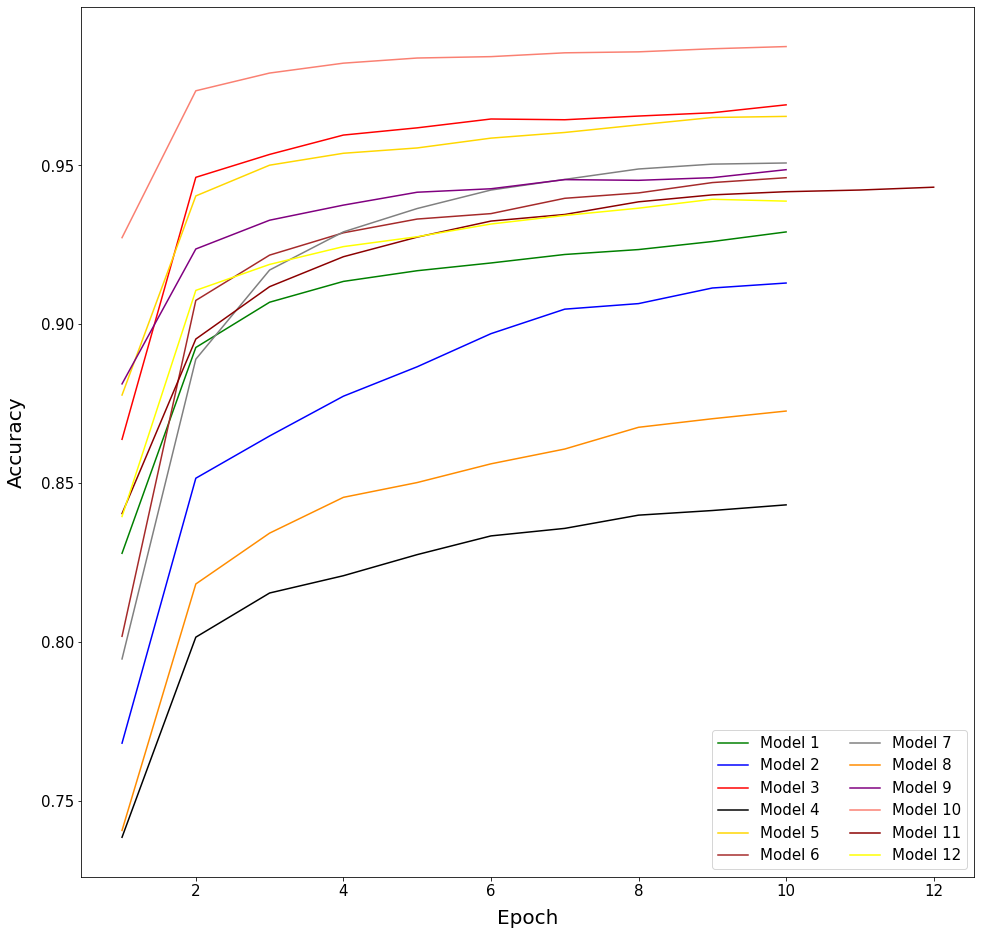

In [ ]:
plt.figure(figsize=(16, 16))
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']
accuracy12 = history12.history['accuracy']
print("First model: 2 Conv-Maxpool + 2 Dense")
print("Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense")
print("Third model: 2 Conv-Maxpool + 3 Dense")
print("Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense")
print("Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense")
print("Sixth model: 2 Conv-Maxpool + 2 Dense + RMSProp")
print("Seventh model: 2 Conv-Maxpool + 2 Dense + MSE")
print("Eighth model: 2 Conv-Maxpool + 2 Dense + Dropout 0.5")
print("Ninth model: 2 Conv-Maxpool + 2 Dense + LR 0.01")
print("Tenth model: 2 Conv-Maxpool (5 - 5) + 2 Dense")
print("Eleventh model: 2 Conv-Maxpool + 2 Dense + Double Epoch")
print("Twelfth model: 2 Conv-Maxpool + 2 Dense + Batch Normalization")
plt.plot(np.linspace(1, 10, 10), accuracy, 'g')
plt.plot(np.linspace(1, 10, 10), accuracy2, 'b')
plt.plot(np.linspace(1, 10, 10), accuracy3, 'r')
plt.plot(np.linspace(1, 10, 10), accuracy4, 'black')
plt.plot(np.linspace(1, 10, 10), accuracy5, 'gold')
plt.plot(np.linspace(1, 10, 10), accuracy6, 'brown')
plt.plot(np.linspace(1, 10, 10), accuracy7, 'grey')
plt.plot(np.linspace(1, 10, 10), accuracy8, 'darkorange')
plt.plot(np.linspace(1, 10, 10), accuracy9, 'purple')
plt.plot(np.linspace(1, 10, 10), accuracy10, 'salmon')
plt.plot(np.linspace(1, 12, 12), accuracy11, 'darkred')
plt.plot(np.linspace(1, 10, 10), accuracy12, 'yellow')
plt.xlabel("Epoch", fontsize = 20, labelpad = 10)
plt.ylabel("Accuracy", fontsize = 20, labelpad = 15)
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6',
            'Model 7', 'Model 8', 'Model 9', 'Model 10', 'Model 11', 'Model 12'],
           loc = 'lower right', prop = {'size': 15}, ncol=2)
print("First model: Loss of final step: {}, Accuracy of final step: {}".format(loss[-1], accuracy[-1]))
print("Second model: Loss of final step: {}, Accuracy of final step: {}".format(loss2[-1], accuracy2[-1]))
print("Third model: Loss of final step: {}, Accuracy of final step: {}".format(loss3[-1], accuracy3[-1]))
print("Fourth model: Loss of final step: {}, Accuracy of final step: {}".format(loss4[-1], accuracy4[-1]))
print("Fifth model: Loss of final step: {}, Accuracy of final step: {}".format(loss5[-1], accuracy5[-1]))
print("Sixth model: Loss of final step: {}, Accuracy of final step: {}".format(loss6[-1], accuracy6[-1]))
print("Seventh model: Loss of final step: {}, Accuracy of final step: {}".format(loss7[-1], accuracy7[-1]))
print("Eighth model: Loss of final step: {}, Accuracy of final step: {}".format(loss8[-1], accuracy8[-1]))
print("Ninth model: Loss of final step: {}, Accuracy of final step: {}".format(loss9[-1], accuracy9[-1]))
print("Tenth model: Loss of final step: {}, Accuracy of final step: {}".format(loss10[-1], accuracy10[-1]))
print("Eleventh model: Loss of final step: {}, Accuracy of final step: {}".format(loss11[-1], accuracy11[-1]))
print("Twelfth model: Loss of final step: {}, Accuracy of final step: {}".format(loss12[-1], accuracy12[-1]))

plt.savefig("Twelfth.jpg")

In [ ]:
net_2conv_init_2dense = models.Sequential([
      layers.Conv2D(5, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1), kernel_initializer=keras.initializers.orthogonal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Conv2D(2, kernel_size = (3, 3), activation = 'relu', kernel_initializer=keras.initializers.orthogonal()),
      layers.MaxPool2D((2, 2), strides = 2),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(5, activation= 'relu'),
      layers.Dense(2, activation= 'sigmoid')
])

net_2conv_init_2dense.summary()

net_2conv_init_2dense.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history13 = net_2conv_init_2dense.fit(train_images, train_labels,
                  epochs = 10, verbose = 1,
                  validation_data=(val_images, val_labels))

First model: 2 Conv-Maxpool + 2 Dense
Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense
Third model: 2 Conv-Maxpool + 3 Dense
Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense
Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense
Sixth model: 2 Conv-Maxpool + 2 Dense + RMSProp
Seventh model: 2 Conv-Maxpool + 2 Dense + MSE
Eighth model: 2 Conv-Maxpool + 2 Dense + Dropout 0.5
Ninth model: 2 Conv-Maxpool + 2 Dense + LR 0.01
Tenth model: 2 Conv-Maxpool (5 - 5) + 2 Dense
Eleventh model: 2 Conv-Maxpool + 2 Dense + Double Epoch
Twelfth model: 2 Conv-Maxpool + 2 Dense + Batch Normalization
Thirteenth model: 2 Conv-Maxpool + 2 Dense + Init
First model: Loss of final step: 0.18856820464134216, Accuracy of final step: 0.9290545582771301
Second model: Loss of final step: 0.2224530130624771, Accuracy of final step: 0.9129818081855774
Third model: Loss of final step: 0.08941951394081116, Accuracy of final step: 0.969036340713501
Fourth model: Loss of final step: 0.3837720453739166, Accuracy of f

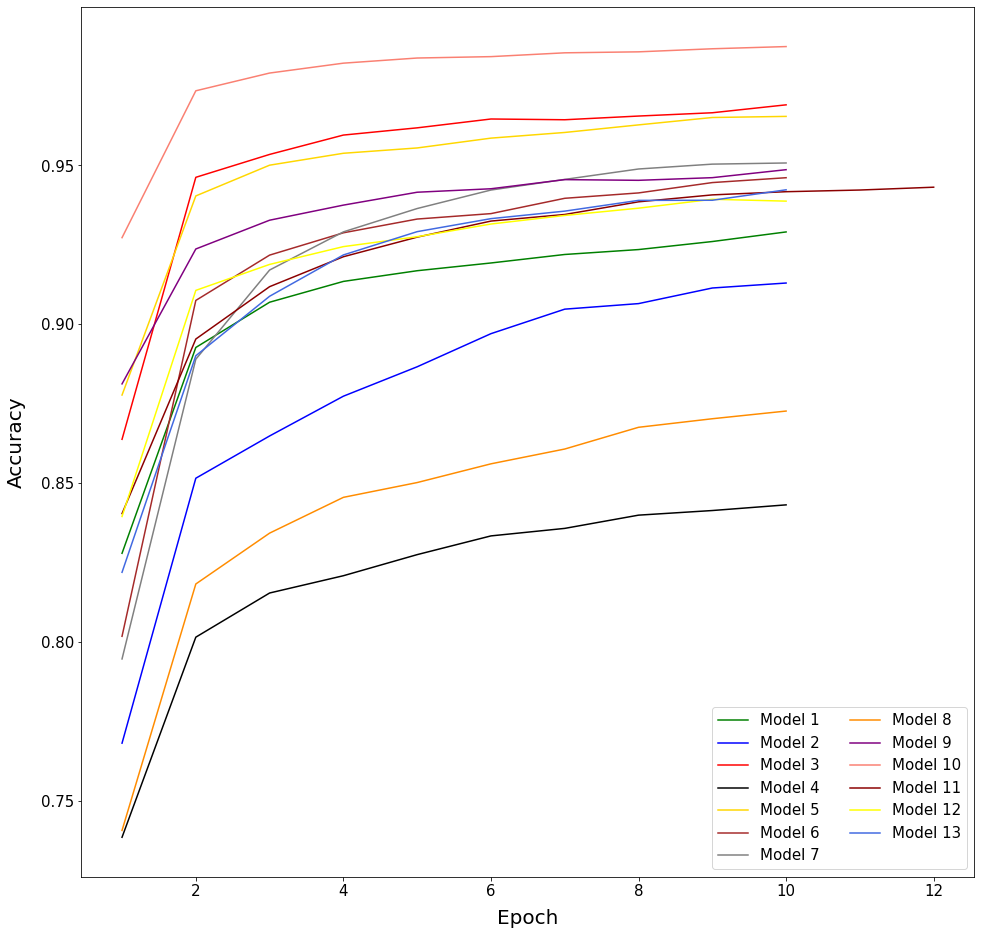

In [ ]:
plt.figure(figsize=(16, 16))
loss13 = history13.history['loss']
val_loss13 = history13.history['val_loss']
accuracy13 = history13.history['accuracy']
print("First model: 2 Conv-Maxpool + 2 Dense")
print("Second model: 2 Conv-Maxpool + 1 Conv + 2 Dense")
print("Third model: 2 Conv-Maxpool + 3 Dense")
print("Fourth model: 2 Conv-Maxpool + Stride of 2 + 2 Dense")
print("Fifth model: 2 Conv-Maxpool + Kernel of 5 by 5 + 2 Dense")
print("Sixth model: 2 Conv-Maxpool + 2 Dense + RMSProp")
print("Seventh model: 2 Conv-Maxpool + 2 Dense + MSE")
print("Eighth model: 2 Conv-Maxpool + 2 Dense + Dropout 0.5")
print("Ninth model: 2 Conv-Maxpool + 2 Dense + LR 0.01")
print("Tenth model: 2 Conv-Maxpool (5 - 5) + 2 Dense")
print("Eleventh model: 2 Conv-Maxpool + 2 Dense + Double Epoch")
print("Twelfth model: 2 Conv-Maxpool + 2 Dense + Batch Normalization")
print("Thirteenth model: 2 Conv-Maxpool + 2 Dense + Init")
plt.plot(np.linspace(1, 10, 10), accuracy, 'g')
plt.plot(np.linspace(1, 10, 10), accuracy2, 'b')
plt.plot(np.linspace(1, 10, 10), accuracy3, 'r')
plt.plot(np.linspace(1, 10, 10), accuracy4, 'black')
plt.plot(np.linspace(1, 10, 10), accuracy5, 'gold')
plt.plot(np.linspace(1, 10, 10), accuracy6, 'brown')
plt.plot(np.linspace(1, 10, 10), accuracy7, 'grey')
plt.plot(np.linspace(1, 10, 10), accuracy8, 'darkorange')
plt.plot(np.linspace(1, 10, 10), accuracy9, 'purple')
plt.plot(np.linspace(1, 10, 10), accuracy10, 'salmon')
plt.plot(np.linspace(1, 12, 12), accuracy11, 'darkred')
plt.plot(np.linspace(1, 10, 10), accuracy12, 'yellow')
plt.plot(np.linspace(1, 10, 10), accuracy13, 'royalblue')
plt.xlabel("Epoch", fontsize = 20, labelpad = 10)
plt.ylabel("Accuracy", fontsize = 20, labelpad = 15)
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6',
            'Model 7', 'Model 8', 'Model 9', 'Model 10', 'Model 11', 'Model 12',
            'Model 13'],
           loc = 'lower right', prop = {'size': 15}, ncol=2)
print("First model: Loss of final step: {}, Accuracy of final step: {}".format(loss[-1], accuracy[-1]))
print("Second model: Loss of final step: {}, Accuracy of final step: {}".format(loss2[-1], accuracy2[-1]))
print("Third model: Loss of final step: {}, Accuracy of final step: {}".format(loss3[-1], accuracy3[-1]))
print("Fourth model: Loss of final step: {}, Accuracy of final step: {}".format(loss4[-1], accuracy4[-1]))
print("Fifth model: Loss of final step: {}, Accuracy of final step: {}".format(loss5[-1], accuracy5[-1]))
print("Sixth model: Loss of final step: {}, Accuracy of final step: {}".format(loss6[-1], accuracy6[-1]))
print("Seventh model: Loss of final step: {}, Accuracy of final step: {}".format(loss7[-1], accuracy7[-1]))
print("Eighth model: Loss of final step: {}, Accuracy of final step: {}".format(loss8[-1], accuracy8[-1]))
print("Ninth model: Loss of final step: {}, Accuracy of final step: {}".format(loss9[-1], accuracy9[-1]))
print("Tenth model: Loss of final step: {}, Accuracy of final step: {}".format(loss10[-1], accuracy10[-1]))
print("Eleventh model: Loss of final step: {}, Accuracy of final step: {}".format(loss11[-1], accuracy11[-1]))
print("Twelfth model: Loss of final step: {}, Accuracy of final step: {}".format(loss12[-1], accuracy12[-1]))
print("Thirteenth model: Loss of final step: {}, Accuracy of final step: {}".format(loss13[-1], accuracy13[-1]))
plt.savefig("Thirteenth")